# William Etzler ECON 4984 Assignment 2

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [75]:
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, GridSearchCV
from sklearn.metrics import mean_squared_error

In [45]:
np.random.seed(64)

## Problem 1 a

In [46]:
betes_path = r'C:\Users\wetzl\Desktop\Python\SSEcon\Data\diabetes.csv'
betes = pd.read_csv(betes_path)
betes.head()

,Unnamed: 0,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
0,1,59,1,32.1,101.0,157,93.2,38.0,4.0,2.110590,87,151
1,2,48,0,21.6,87.0,183,103.2,70.0,3.0,1.690196,69,75
2,3,72,1,30.5,93.0,156,93.6,41.0,4.0,2.029384,85,141
3,4,24,0,25.3,84.0,198,131.4,40.0,5.0,2.123852,89,206
4,5,50,0,23.0,101.0,192,125.4,52.0,4.0,1.863323,80,135


In [47]:
scalera = StandardScaler()

X1a = betes.iloc[:, 1:-1]
y1a = betes['prog']
Xa_standardized = scalera.fit_transform(X1a)

X_standardized_with_const = sm.add_constant(Xa_standardized)
model1a = sm.OLS(y1a, X_standardized_with_const).fit()

a_summary = model1a.summary()
print(a_summary)

                            OLS Regression Results                            
Dep. Variable:                   prog   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           3.83e-62
Time:                        21:33:12   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

The variables sex, bmi, map, and ltg have extremely low p-values and higher t-scores, making them statistically significant predictors of the dependent variable prog. Variables such as age, ldl, hdl, tch, and glu do not seem to significantly predict prog, as indicated by their > .05 p-values. They y-intercept const is high and negative, implying prog is negative when all predictors are zero.  
The R-squared value of .518 indicates that the model explains 51.8% of the variance in the dependent variable.

## Problem 1 b

In [70]:
#Modeling the standard errors of the coefficients
n_bootstraps = 1000

bootstrap_coefsb = np.zeros((n_bootstraps, betes.shape[1] - 1))  # Coefficients, excluding intercept
modelb = LinearRegression()
scalerb = StandardScaler()

for i in range(n_bootstraps):
    bootstrap_sampleb = betes.sample(n=betes.shape[0], replace=True)
    X_sampleb = bootstrap_sampleb.iloc[:, :-1]  
    y_sampleb = bootstrap_sampleb.iloc[:, -1]  
    X_standardizedb = scalerb.fit_transform(X_sampleb)

    modelb.fit(X_standardizedb, y_sampleb)

    bootstrap_coefsb[i, :] = modelb.coef_  

linreg_standard_errors = np.std(bootstrap_coefsb, axis=0)

# Compare the standard errors from OLS and linear regression in Table 1
OLS_se = pd.DataFrame({'OLS SE': [2.576, 2.842 , 2.912, 3.165, 3.112, 19.820, 16.126, 10.109, 7.681, 8.177, 3.139]})
linreg_se = pd.DataFrame({'LinReg SE': linreg_standard_errors}).round(3)
variables_list = ['const'] + list(betes.columns[1:-1])
column_names_df = pd.DataFrame({'Variable': variables_list})
std_comparisonb = pd.concat([column_names_df, OLS_se, linreg_se], axis=1)
std_comparisonb['SE_Change'] = round((std_comparisonb['LinReg SE'] - std_comparisonb['OLS SE']), 3)

print(f'Table 1')
std_comparisonb

Table 1


,Variable,OLS SE,LinReg SE,SE_Change
0,const,2.576,2.469,-0.107
1,age,2.842,2.720,-0.122
2,sex,2.912,2.773,-0.139
3,bmi,3.165,3.447,0.282
4,map,3.112,3.150,0.038
5,tc,19.820,19.713,-0.107
6,ldl,16.126,15.819,-0.307
7,hdl,10.109,9.956,-0.153
8,tch,7.681,7.805,0.124
9,ltg,8.177,7.781,-0.396


In most cases, bootstrapping the standard errors of the coefficients in linear regression results in a lower standard error than the OLS standard error. The lower standard errors represnts higher precision estimates with less uncertainty about the accuracy of coefficients. 

## Problem 1 c

In [65]:
#Using bootstrap to estimate the standard errors of the ridge coefficients
alpha = 0.5

bootstrap_coefsc = np.zeros((n_bootstraps, betes.shape[1] - 1))
ridge_model = Ridge(alpha=alpha)
scalerc = StandardScaler()

for i in range(n_bootstraps):
    bootstrap_sample = betes.sample(n=betes.shape[0], replace=True)
    X_samplec = bootstrap_sample.iloc[:, :-1]
    y_samplec = bootstrap_sample.iloc[:, -1]
    X_standardizedc = scalerb.fit_transform(X_samplec)
    
    ridge_model.fit(X_standardizedc, y_samplec)
    bootstrap_coefsc[i, :] = ridge_model.coef_

#Collect the standard errors of the coefficients in Table 2
ridge_standard_errors = np.std(bootstrap_coefsc, axis=0)
ridge_standard_errors = pd.DataFrame(ridge_standard_errors, columns=['Ridge SE']).round(3)

std_comparisonc = pd.concat([std_comparisonb, ridge_standard_errors], axis=1)
std_comparisonc = std_comparisonc.drop('SE_Percent_Change', axis=1)

print(f'Table 2')
std_comparisonc

Table 2


,Variable,OLS SE,LinReg SE,Ridge SE
0,const,2.576,2.518,2.450
1,age,2.842,2.775,2.774
2,sex,2.912,2.782,2.835
3,bmi,3.165,3.399,3.269
4,map,3.112,3.187,3.168
5,tc,19.820,19.185,16.952
6,ldl,16.126,15.217,13.743
7,hdl,10.109,9.646,8.641
8,tch,7.681,7.323,7.464
9,ltg,8.177,7.808,7.190


The ridge bootstrapped standard erros are lower than the OLS and LinReg standard errors in most cases. This is because ridge regression shrinks the coefficients towards zero, reducing the variance of the coefficients. 


## Problem 2 a

In [50]:
spam_path = r'C:\Users\wetzl\Desktop\Python\SSEcon\Data\SPAM.csv'
spam = pd.read_csv(spam_path)
spam.head() #SPAM IS Y

,spam,testid,make,address,all,3d,our,over,remove,internet,...,conference,ch;,ch(,ch[,ch!,ch$,ch#,crl.ave,crl.long,crl.tot
0,True,True,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,True,False,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,True,True,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,True,False,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,True,False,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [71]:
y = spam.iloc[:, 0]  
X = spam.iloc[:, 1:] 

# Convert boolean target into integer 
y = y.astype(int)

dtree = DecisionTreeClassifier(random_state=42)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define a range of "max_leaf_nodes" to search for the best performance
param_grid = {'max_leaf_nodes': list(range(2, 100))}

# Set up GridSearchCV to find the best "max_leaf_nodes"
grid_search = GridSearchCV(dtree, param_grid, cv=kfold, scoring='accuracy')

# Perform grid search on data
grid_search.fit(X, y)

# Perform cross-validation on the best model and print results
best_tree_model = grid_search.best_estimator_
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
best_cross_val_score = grid_search.best_score_

print(f'Best max_leaf_nodes: {best_max_leaf_nodes}')
print(f'Best Cross-Validation Score: {best_cross_val_score:.4f}')

cv_scores = cross_val_score(best_tree_model, X, y, cv=kfold)

print(f'CV Scores for Best Model: {cv_scores}')
print(f'CV Scores Mean: {np.mean(cv_scores):.4f}')
print(f'CV Scores Std: {np.std(cv_scores):.4f}')

Best max_leaf_nodes: 86
Best Cross-Validation Score: 0.9270
CV Scores for Best Model: [0.93926247 0.90434783 0.93695652 0.93478261 0.91086957 0.91956522
 0.90652174 0.94130435 0.9326087  0.94347826]
CV Scores Mean: 0.9270
CV Scores Std: 0.0144


## Problem 2 b

In [76]:
logistic = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Define a range for C (inverse of regularization strength)
C_range = np.logspace(-4, 4, 20)

# Set up GridSearchCV to find the best C value
grid_search_logistic = GridSearchCV(logistic, {'C': C_range}, cv=kfold, scoring='accuracy')
grid_search_logistic.fit(X, y)

# Get the best model and C value
best_logistic_model = grid_search_logistic.best_estimator_
best_C = grid_search_logistic.best_params_['C']
best_logistic_score = grid_search_logistic.best_score_

print(f'Best C for Logistic Regression: {best_C}')
print(f'Best Cross-Validation Score for Logistic Regression: {best_logistic_score:.4f}')

# Perform cross-validation on the best Logistic Regression model and print results
cv_scores_logistic = cross_val_score(best_logistic_model, X, y, cv=kfold)

print(f'CV Scores for Best Logistic Regression Model: {cv_scores_logistic}')
print(f'CV Scores Mean for Logistic Regression: {np.mean(cv_scores_logistic):.4f}')
print(f'CV Scores Std for Logistic Regression: {np.std(cv_scores_logistic):.4f}')

# Compare
print(f'\nComparison of Tree and Logistic Regression Models:')
print(f'Tree Model Best CV Score: {best_cross_val_score:.4f}')
print(f'Logistic Regression Model Best CV Score: {best_logistic_score:.4f}')


Best C for Logistic Regression: 1.623776739188721
Best Cross-Validation Score for Logistic Regression: 0.9291
CV Scores for Best Logistic Regression Model: [0.92407809 0.92391304 0.93913043 0.92391304 0.91521739 0.94347826
 0.92173913 0.94565217 0.92608696 0.92826087]
CV Scores Mean for Logistic Regression: 0.9291
CV Scores Std for Logistic Regression: 0.0096

Comparison of Tree and Logistic Regression Models:
Tree Model Best CV Score: 0.9270
Logistic Regression Model Best CV Score: 0.9291


## Problem 3 a

In [52]:
nova_path = r'C:\Users\wetzl\Desktop\Python\SSEcon\Data\supernova.txt'
nova = (pd.read_csv(nova_path, delimiter = ' '))
nova.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,Magnitude
SN1,-0.839,-0.927,0.320,0.176,-0.676,-1.272,0.342,-0.427,-0.016,-0.298,-0.543
SN2,-1.892,-0.455,2.407,0.766,-0.944,-1.527,0.088,0.261,0.185,-0.537,2.124
SN3,0.264,-0.803,1.141,-0.863,0.685,-0.354,-1.038,-1.098,-1.319,-1.695,-0.217
SN4,-0.083,1.023,-0.206,-1.115,-0.863,0.715,0.616,0.564,0.615,-0.488,0.946
SN5,0.411,-0.807,-0.129,1.315,-0.647,0.299,-0.822,-1.534,-1.486,-1.087,-3.746


In [53]:
X3a = nova.iloc[:, :-1]
y3a = nova['Magnitude']

X3a_w_const = sm.add_constant(X3a)
model3a = sm.OLS(y3a, X3a_w_const).fit()
print(model3a.summary())

                            OLS Regression Results                            
Dep. Variable:              Magnitude   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     12.44
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           7.18e-08
Time:                        21:33:56   Log-Likelihood:                -48.898
No. Observations:                  39   AIC:                             119.8
Df Residuals:                      28   BIC:                             138.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.821e-05      0.160      0.000      1.0

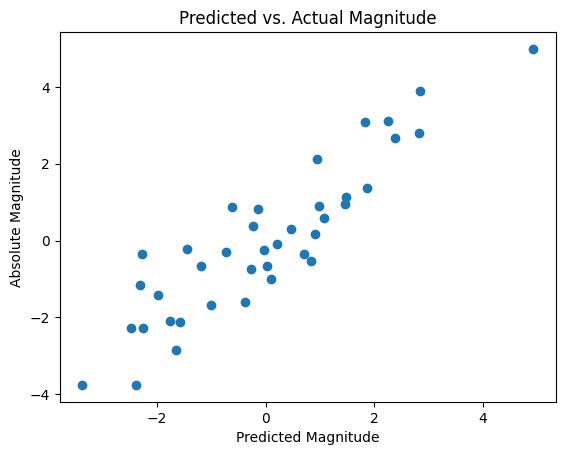

In [54]:
#plot predicted y's against actual y's
y3a_pred = model3a.predict(X3a_w_const)
plt.scatter(y3a_pred, y3a)
plt.xlabel('Predicted Magnitude')
plt.ylabel('Absolute Magnitude')
plt.title('Predicted vs. Actual Magnitude')
plt.show()

## Problem 3 b

In [55]:
coefficients = model3a.params
abs_coefficients = coefficients.abs()

smallest_predictors = abs_coefficients.sort_values().head(6).index
smallest_predictors = smallest_predictors.drop('const')
X3a_reduced = X3a.drop(columns=smallest_predictors)

X3a_reduced_w_const = sm.add_constant(X3a_reduced)
reduced_model3a = sm.OLS(y3a, X3a_reduced_w_const).fit()

print(reduced_model3a.summary())

                            OLS Regression Results                            
Dep. Variable:              Magnitude   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.50
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           7.09e-11
Time:                        21:33:56   Log-Likelihood:                -49.920
No. Observations:                  39   AIC:                             111.8
Df Residuals:                      33   BIC:                             121.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.74e-05      0.151      0.000      1.0

## Problem 3 c

In [56]:
# For the initial model with all predictors
model3a_predictions = model3a.predict(X3a_w_const)
model3a_residuals = y3a - model3a_predictions
i3a_RSS = (model3a_residuals**2).sum()
i3a_MSE = (model3a_residuals**2).mean()

# For the reduced model with top 5 predictors
reduced_predictions = reduced_model3a.predict(X3a_reduced_w_const)
reduced_residuals = y3a - reduced_predictions
reduced_RSS = (reduced_residuals**2).sum()
reduced_MSE = (reduced_residuals**2).mean()

Comparison_3a = pd.DataFrame({
    'Initial Model': {
        'RSS': i3a_RSS,
        'MSE': i3a_MSE,
        'R-squared': model3a.rsquared,
        'Adjusted R-squared': model3a.rsquared_adj
    },
    'Reduced Model': {
        'RSS': reduced_RSS,
        'MSE': reduced_MSE,
        'R-squared': reduced_model3a.rsquared,
        'Adjusted R-squared': reduced_model3a.rsquared_adj
    }
})

Comparison_3a

,Initial Model,Reduced Model
RSS,28.029899,29.537619
MSE,0.718715,0.757375
R-squared,0.816333,0.806454
Adjusted R-squared,0.750738,0.777129


While the initial model has better RSS, MSE, and R-Suared values, the reduced model has a higher adjusted R-squared value. This indicates that the predictors eliminated may have been insignificant and were not adding much value to the initial model. While the initial model may have been over-fitting, the reduced model is more parsimonious and may generalize better to new data despite discrepancies in the RSS and MSE values.

## Problem 4 a

In [57]:
loo = LeaveOneOut()
initial_model_loocv_errors = []
reduced_model_loocv_errors = []

for train_index, test_index in loo.split(X3a):
    # Initial model LOOCV
    X4a_train, X4a_test = X3a_w_const.iloc[train_index], X3a_w_const.iloc[test_index]
    y4a_train, y4a_test = y3a.iloc[train_index], y3a.iloc[test_index]
    
    model4a = sm.OLS(y4a_train, X4a_train).fit()
    y_pred4a = model4a.predict(X4a_test)
    initial_model_loocv_errors.append(mean_squared_error(y4a_test, y_pred4a, squared=False))
    # Reduced model LOOCV
    X4a_train_reduced, X4a_test_reduced = X3a_reduced_w_const.iloc[train_index], X3a_reduced_w_const.iloc[test_index]
    
    reduced_model4a = sm.OLS(y4a_train, X4a_train_reduced).fit()
    y_pred_reduced4a = reduced_model4a.predict(X4a_test_reduced)
    reduced_model_loocv_errors.append(mean_squared_error(y4a_test, y_pred_reduced4a, squared=False))

# Calculate the average LOOCV error for both models
initial_loocv_error = np.mean(initial_model_loocv_errors)
reduced_loocv_error = np.mean(reduced_model_loocv_errors)

print(f'Initial Model LOOCV Error: {initial_loocv_error}')
print(f'Reduced Model LOOCV Error: {reduced_loocv_error}')

Initial Model LOOCV Error: 1.0342284916015783
Reduced Model LOOCV Error: 0.8840251088525131


C:\Users\wetzl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wetzl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wetzl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wetzl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

## Problem 4 b

In [77]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_errors_initial_model = []
cv_errors_reduced_model = []

# Perform cross validation
for train_index, test_index in kf.split(X3a):
    X_train, X_test = X3a.iloc[train_index], X3a.iloc[test_index]
    y_train, y_test = y3a.iloc[train_index], y3a.iloc[test_index]
    # Fit the initial model
    X_train_w_const = sm.add_constant(X_train)
    initial_model = sm.OLS(y_train, X_train_w_const).fit()
    # Predict and calculate error for the initial model
    initial_predictions = initial_model.predict(sm.add_constant(X_test))
    cv_errors_initial_model.append(mean_squared_error(y_test, initial_predictions))
    # Find the smallest predictors based on this fold
    coefficients = initial_model.params
    abs_coefficients = coefficients.abs().drop('const')
    smallest_predictors = abs_coefficients.sort_values().head(5).index
    # Drop the smallest predictors and retrain
    X_train_reduced = X_train.drop(columns=smallest_predictors)
    X_train_reduced_w_const = sm.add_constant(X_train_reduced)
    reduced_model = sm.OLS(y_train, X_train_reduced_w_const).fit()
    # Predict and calculate error for the reduced model
    X_test_reduced = X_test.drop(columns=smallest_predictors)
    reduced_predictions = reduced_model.predict(sm.add_constant(X_test_reduced))
    cv_errors_reduced_model.append(mean_squared_error(y_test, reduced_predictions))

# Calculate the average CV error for both models
average_cv_error_initial_model = np.mean(cv_errors_initial_model)
average_cv_error_reduced_model = np.mean(cv_errors_reduced_model)

print(f'Average CV Error Initial Model: {average_cv_error_initial_model}')
print(f'Average CV Error Reduced Model: {average_cv_error_reduced_model}')

Average CV Error Initial Model: 1.7415770058070863
Average CV Error Reduced Model: 1.7928084430313707


The initial model has an average cross-validation error of approximately 1.74, which suggests that on average, the squared deviations of the predicted values from the actual values across all folds are around this value.
The reduced model, which excludes the five predictors with the smallest coefficients in absolute value, has a slightly higher average cross-validation error of approximately 1.79

The fairly insubstantial difference in the average cross-validation errors suggests that while the removed variables did contribute some, the reduced model may be more parsimonious without sacrificing much predictive accuracy. 

## Problem 5

A nonparametric bootstrap sample mimics drawing an i.i.d. sample from the population by treating the original sample as a representation of the true population distribution. Each bootstrap sample is drawn with replacement from the original data, which means every observation has the same chance to appear again, ensuring the "identically distributed" condition. 